# Demo: Gaussian Process Regression

Gaussian Processes are a generic supervised learning method designed to solve regression problems among other things.

Gaussian Process Regression (GPR) is a nonparametric, Bayesian approach to regression.

For simplicity this demo involves Gaussian Process Regression based on fixed hyper-parameters.

GPR can be carried out easily by the function GaussianProcessRegressor from the sklearn library.

Users interested in theoretical underpinnings behind GPR are kindly referred to:

- Murphy, K. P. (2012), Machine Learning. A Probabilistic Perspective, MIT -----> see section 15.2
- Bishop, C. M. (2006), Pattern Recognition and Machine Learning, Springer ---> see section 6.4.2

Brief introduction to Gaussian processes for supervised learning is also provided below.

# Introduction to Gaussian processes for supervised learning

In Bayesian non-parametrics a Gaussian process prior is used to estimate uknown function in supervised learning settting. One does not assume a specific function between $\mathbf{y}$ and $\mathbf{x}$ and instead performs Bayesian inference on the function. 

## Bayesian non-parametrics

Let $\mathscr{X}$ be a set and $\mathscr{F}$ be a set of functions over $\mathscr{X}$, for example smooth functions. We observe $(x_1,y_1),...,(x_t,y_t),...,(x_T,y_T)$, where $x_t \in \mathscr{X}$, $y_t \in \mathscr{R}$, $t=1,...,T$, satisfying

\\[
    \begin{equation}
    y_t = f(x_t) + \epsilon_t
    \end{equation}
\\]

where $f \in \mathscr{F}$ and $\epsilon=(\epsilon_1,...,\epsilon_T)$ are independent of $\mathbf{x}=(x_1,...,x_T)$. Errors $\mathbf{\epsilon}$ have density $\pi(\mathbf{\epsilon})$ and usually it is $N(\mathbf{0}_T,\sigma_{\mathbf{\epsilon}}^2 I_T$), $\mathbf{0}_T$ being $T\times 1$ vector of zeros, what further implies that

\\[
    \begin{equation}
    \mathbf{y} = (y_1,...,y_T)|\mathbf{f},\mathbf{x},\sigma_{\mathbf{\epsilon}}^2 \sim N(\mathbf{f},\sigma_{\mathbf{\epsilon}}^2 \mathbf{I}_T)
    \end{equation}
\\]

where $\mathbf{f}=[f(x_1),...,f(x_T)]'$.

In a Bayes regression we assign prior $\pi(f)$ to $f$ and compute posterior

\\[
    \begin{equation}
    \pi(f|\mathbf{y}) = \frac{\pi(f)l(\mathbf{\epsilon}|f)}{\int_{\mathscr{F}}\pi(f)l(\mathbf{\epsilon}|f)df}
    \end{equation}
\\]

where $l(\mathbf{\epsilon}|f)$ is the likelihood. Then $f$ can be estimated by its posterior mean.

## Gaussian process theory

$\mathbf{Definition}$. Let $\mathscr{X}$ be a set. A random function $f:\mathscr{X}\to\mathscr{R}$ is called Gaussian process (GP) if for any $x_1,...,x_T\in\mathscr{X}$, $\mathbf{f}=[f(x_1),...,f(x_T]'$ has a multivariate normal distribution. Gaussian process is characterized by the mean $f_0(\cdot)$ and the covariance kernel $K(\cdot,\cdot)$. The latter is a positive definite function $K:\mathscr{X}\times\mathscr{X}\to\mathscr{R}$. If $f$ is a GP with mean $f_0$ and covariance kernel $K$ then

\\[
    \begin{equation}
    \mathbf{f}=[f(x_1),...,f(x_T]' \sim N(\mathbf{f}_0,\mathbf{K})
    \end{equation}
\\]

where $\mathbf{f}_0=[f_0(x_1),...,f_0(x_T]$ and $\mathbf{K}$ is $T \times T$ matrix with elements $K(s,t)$ such that $s,t=1,...,T$.

There are numerous possibilities when it comes to covariance kernels and their choice depends on the application. For instance, they can be $\textbf{linear}$

\\[
    \begin{equation}
    \mathbf{K}(\mathbf{x},\mathbf{x}') = \left\langle \mathbf{x},\mathbf{x}' \right\rangle
    \end{equation}
\\]

or $\textbf{squared exponential}$

\\[
    \begin{equation}
    \mathbf{K}(\mathbf{x},\mathbf{x}') = e^{-\frac{\left\|\mathbf{x}-\mathbf{x}'\right\|^2}{2\sigma^2}}
    \end{equation}
\\]

among others. Kernels can also be combined. Interested user is referred to the literature cited above.

## Gaussian process regression

For $t=1,...,T$ assume that

\\[
    \begin{equation}
    y_t = f(x_t) + \epsilon_t
    \end{equation}
\\]

where

$$
\epsilon_t\sim N(0,\sigma_{\epsilon}^2) \\
\pi(f) = GP(0,K) \\
$$

where $f$ and $(\epsilon_1,...,\epsilon_T)$ are independent and for simplicity we assume that $f_0=0$ what is also a usual assumption made in applications.

Marginal distribution of $\mathbf{y}$ is thus multivariate normal with means $E(y_t)=0$ and covariances $Cov(y_s,y_t)=K(x_s,x_t) + \sigma_{\epsilon}^2 I(s=t)$, with $s,t=1,...,T$. In matrix notation, where $\mathbf{K}_T$ denotes the $T\times T$ matrix containing all the $(x_s,x_t)$ pairs, we get

\\[
    \begin{equation}
    \mathbf{y} \sim N(\mathbf{0}_T,\mathbf{K}_T + \sigma_{\mathbf{\epsilon}}^2 \mathbf{I}_T)
    \end{equation}
\\]

Since for each $x_t \in \mathscr{X}$ and $y_t$ we have that $Cov(f(x_s),y_t)=K(x_s,x_t)$, by the multivariate normal regression lemma the joint distribution of $\mathbf{f}$ and $\mathbf{y}$ is

\\[
    \begin{equation}
    \left(
        \begin{array}\\
        \mathbf{f} \\
        \mathbf{y}
        \end{array}
    \right) \sim N \left[
        \left(\begin{array}\\
        \mathbf{0}_T \\
        \mathbf{0}_T
        \end{array}\right),\left(
        \begin{matrix}
        \mathbf{K}_T & \mathbf{K}_T \\
        \mathbf{K}_T & \mathbf{K}_T + \sigma_{\epsilon}^2 \mathbf{I}_T
        \end{matrix}
        \right)
    \right]
    \end{equation}
\\]

where $\mathbf{f}=[f(x_1),...,f(x_T)]'$ and $\mathbf{0}_T$ is a $T\times 1$ vector of zeros.

Under such assumptions, the distribution of $\mathbf{f}|\mathbf{y}$ is a GP with mean $\mathbf{M}_f$ and covariance kernel $\mathbf{V}_f$ which are following

$$
\mathbf{M}_f = \mathbf{K}_T[\mathbf{K}_T+\sigma_{\epsilon}^2 \mathbf{I}_T]^{-1}\mathbf{y} \\
\mathbf{V}_f = \mathbf{K}_T-\mathbf{K}_T[\mathbf{K}_T+\sigma_{\epsilon}^2 \mathbf{I}_T]^{-1}\mathbf{K}_T
$$

To project $y_{T+1}$ based on $x_{T+1}$ we need to find the joint distribution of $\mathbf{y}$ and $y_{T+1}$, given $\mathbf{x}$ and $x_{T+1}$. To that end we note that $Cov(y_t,y_{T+1})=K(x_t,x_{T+1}$ for $t=1,...,T$ and we let $\mathbf{k}_{T+1}=[K(x_1,x_{T+1}),...,K(x_T,x_{T+1})]'$ to arrive at

\\[
    \begin{equation}
    \left(
        \begin{array}\\
        y_{T+1} \\
        \mathbf{y}
        \end{array}
    \right) \sim N \left[
        \left(\begin{array}\\
        \mathbf{0}_T \\
        \mathbf{0}_T
        \end{array}\right),\left(
        \begin{matrix}
        K(x_{T+1},x_{T+1})+\sigma_{\epsilon}^2 & \mathbf{k}_{T+1}' \\
        \mathbf{k}_{T+1} & \mathbf{K}_T + \sigma_{\epsilon}^2 \mathbf{I}_T
        \end{matrix}
        \right)
    \right]
    \end{equation}
\\]

Then $y_{T+1}|y$ is a Gaussian with mean $M_{T+1}$ and variance $V_{T+1}$ such that

$$
M_{T+1} = \mathbf{k}_{T+1}'[\mathbf{K}_T+\sigma_{\epsilon}^2 \mathbf{I}_T]^{-1}\mathbf{y} \\
V_{T+1} = K(x_{T+1},x_{T+1})+\sigma_{\epsilon}^2-\mathbf{k}_{T+1}'[\mathbf{K}_T+\sigma_{\epsilon}^2 \mathbf{I}_T]^{-1}\mathbf{k}_{T+1}
$$

Posterior distribution of $f$ still depends on unknown vector of parameters $\mathbf{\theta}$ consisting of $\sigma_{\epsilon}$ and any hyper-parameters of $K$, for example $\sigma$ for squared exponential kernel. Two methods can be used to estimate $\mathbf{\theta}$.

We can maximize the marginal likelihood $\pi(\mathbf{y}|\mathbf{\theta})$ which is a multivariate normal density with mean $\mathbf{0}_T$ and covariance matrix $\mathbf{V}_y=\mathbf{K}_{T}+\sigma_{\epsilon}^2 \mathbf{I}_T$. Doing so is denoted empirical Bayes.

We can also put a prior on the hyper-parameters and estimate them by their posterior means. Doing this is known as hierarchical Bayes.

# The model: 1

In our exercise, the goal is to obtain the forward path of quarterly y-o-y growth rates of residential property prices ($RPP$) based on available forward path of quarterly y-o-y growth rates of gross domestic product ($GDP$) for the euro area (EA), under baseline and adverse scenarios. We will achieve this using linear (model 1) regression. We will proceed within the Gaussian process framework using the implementation provided by the scikit-learn (sklearn) library available for Python.

Methodologically, we follow the exposition outlined in the above cell and for $t=1,...,T$ assume that

\\[
    \begin{equation}
    y_t = f(x_t) + \epsilon_t
    \end{equation}
\\]

where

$$
\epsilon_t\sim N(0,\sigma_{\epsilon}^2) \\
\pi(f) = GP(0,K_c) \\
$$

and $K_c$ is a combination of constant and linear kernels for model 1. In both cases we literally employ a constant and $GDP$ (our $\mathbf{x}$) to explain and later project the evolution of $RPP$ (our $\mathbf{y}$), in a linear (model 1) fashion.

For simplicity, we do not estimate the unknown parameters $\theta$ consisting of $\sigma_{\epsilon}$ and any hyper-parameters of $K_c$, and fix them instead assuming they result from policy considerations.

# Implementation

### Import tools and settings

In [1]:
# fetch modules

# modules for data management
import openpyxl
import numpy as np
import pandas as pd
# modules for making charts
import matplotlib.pylab as plt
import seaborn as sns
# module with GP implementation
from sklearn import gaussian_process

# add parent directory to path
import os,sys,inspect
from pathlib import Path
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
print(parent_dir)
sys.path.insert(0, parent_dir)

# fetch model 1

# model 1: linear regression
import demo_model_1 as model_1

C:\Users\ttelesz\AppData\Local\Temp


### MLFlow: Tracking URI and Library imports details
Import mlflow libraries and their methods log_metric,log_param,log_artifacts

Set the tracking uri of mlflow and MLFLOW_TRACKING_INSECURE_TLS to True (if set to the true MLflow does not verify the TLS connection, meaning it does not validate certificates or hostnames for https:// tracking URIs.  
#### MLFLOW_TRACKING_INSECURE_TLS flag value true is not recommended for production environments.

In [2]:
# fetch mlflow and related modules
from mlflow import log_metric,log_param,log_artifact
import mlflow
import urllib3
import datetime

# configure core variables and setup mlflow
mlflow_server = '127.0.0.1:5000'
mlflow_tracking_uri='http://' + mlflow_server
mlflow.set_tracking_uri(mlflow_tracking_uri)
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

### MLFlow:Setting Experiment and Run
#### Set the experiment name :
  experiment_name = Set given experiment as active experiment. If experiment does not exist, create an experiment with provided name.
#### Start the run by providing the following parameters:
 ##### mlflow.start_run(run_id=None, experiment_id=None, run_name=None, nested=False)
  Parameters :
  
    run_id – If specified, get the run with the specified UUID and log parameters and metrics under that run. The run’s end time is unset and its status is set to running, but the run’s other attributes (source_version, source_type, etc.) are not changed.
   
    experiment_id – ID of the experiment under which to create the current run (applicable only when run_id is not specified).If experiment_id argument is unspecified, will look for valid experiment in the following order: activated using set_experiment, MLFLOW_EXPERIMENT_NAME environment variable, MLFLOW_EXPERIMENT_ID environment variable, or the default experiment as defined by the tracking server.
   
    run_name – Name of new run (stored as a mlflow.runName tag). Used only when run_id is unspecified.
   
    nested – Controls whether run is nested in parent run. True creates a nest run.
  

In [3]:
experiment_name ='Demo_mlflow'
mlflow.set_experiment(experiment_name)
# Get current date and time and create run id
now=datetime.datetime.now()
myrun_id=now.strftime("%Y-%m-%d %H:%M:%S")
# myrun_name is combination of model # and run id(date and time combination)
myrun_name=''.join(['model_1_',myrun_id])
mlflow.start_run(run_name=myrun_name,nested=True)

2023/05/27 16:28:20 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



<ActiveRun: >

### Fetch data

We illustrate GPR on a dataset comprised of residential property prices (RPP) and GDP, quarterly yoy growths.

In [4]:
# fetch growth RPP and GDP data

rpp = pd.read_excel(open('../demo_data/Demo_data.xlsx','rb'),index_col=0,sheet_name='G4-RPP')
yer = pd.read_excel(open('../demo_data/Demo_data.xlsx','rb'),index_col=0,sheet_name='G4-YER')

y = rpp['G4-RPP']
x = yer['G4-YER']

X = x.values.reshape(-1,1)
X = np.flip(X,axis=0)

Y = y.values.reshape(-1,1)
Y = np.flip(Y,axis=0)

In [5]:
# fetch assumed baseline and adverse GDP growth

X_pred_Adve = yer['Adverse YoY']
is_X_null = pd.isna(X_pred_Adve)
X_pred_Adve = X_pred_Adve[is_X_null==False]
X_pred_Adve = X_pred_Adve.values.reshape(-1,1)

X_pred_Base = yer['Baseline YoY']
is_X_null = pd.isna(X_pred_Base)
X_pred_Base = X_pred_Base[is_X_null==False]
X_pred_Base = X_pred_Base.values.reshape(-1,1)

### Tune parameters

In [6]:
# create hybrid kernel for model 1 
# from elementary kernels

# model 1:

# model 1 common elementary kernel: WhiteKernel 
noise_level_model_1 = 1 # USE FOR TUNING

# model 1 specific elementary kernel: Dot-Product
sigma_model_1 = 1 # USE FOR TUNING

### Set up kernel

In [7]:
# combine elementary kernels into hybrid kernel for model 1
kernel_model_1 = model_1.linear_kernel(sigma_lk=sigma_model_1, \
                                       noise_level_lk=noise_level_model_1)

### MLFlow : Set Tag
#### Set a tag under the current run. If no run is active, this method will create a new active run.
    mlflow.set_tag(key, value)
#### Parameters
    key – Parameter name (string)
    value – Parameter value (string)

In [8]:
# set the kernel tag
mlflow.set_tag('kernel_model_1',kernel_model_1)

### MLFlow : Log Parameters
#### Log the parameter(s) under the current run. If no run is active, this method will create a new active run.
    mlflow.log_param(key, value)
#### Parameters
    key – Parameter name (string)
    value – Parameter value (string)

In [9]:
mlflow.log_param("noise_level_model_1",noise_level_model_1)
mlflow.log_param("sigma_model_1",sigma_model_1)

1

### Set up model

In [10]:
# set up linear model 1

gp_model_1 = gaussian_process.GaussianProcessRegressor(optimizer=None,kernel=kernel_model_1)
gp_model_1.fit(X, Y)

GaussianProcessRegressor(kernel=1**2 + DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         optimizer=None)

In [11]:
# inspect kernel in model 1

gp_model_1.kernel_

1**2 + DotProduct(sigma_0=1) + WhiteKernel(noise_level=1)

### Get projection

In [12]:
# project RPP growth using model 1

Y_pred_Base, sigma_Base = gp_model_1.predict(X_pred_Base, return_std=True)
Y_pred_Adve, sigma_Adve = gp_model_1.predict(X_pred_Adve, return_std=True)

In [13]:
# save projections

results_path=Path(parent_dir) / 'demo_results'
results_path.mkdir(exist_ok=True,parents=True)

# save baseline
pd.DataFrame(Y_pred_Base).to_csv(results_path /str('Baseline_model_1.csv'),index=None,header=None)
# save adverse
pd.DataFrame(Y_pred_Adve).to_csv(results_path /str('Adverse_model_1.csv'),index=None,header=None)

### Visual inspection

In [14]:
graph_path=Path(parent_dir) / 'demo_charts'
graph_path.mkdir(exist_ok=True,parents=True)

Text(0.5, 1.0, 'EA quarterly yoy GDP level growth projection - input')

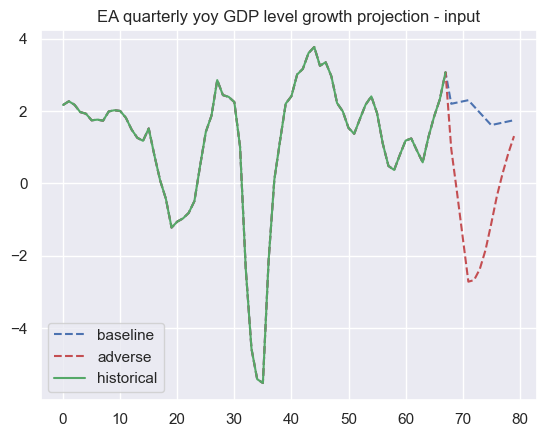

In [15]:
# refine charts automatically
sns.set()

# plot given GDP growth projections in baseline and adverse scenario

plt.plot(np.concatenate((X,X_pred_Base.reshape(X_pred_Base.size,1)),axis=0),'b--',label=r'baseline')
plt.plot(np.concatenate((X,X_pred_Adve.reshape(X_pred_Adve.size,1)),axis=0),'r--',label=r'adverse')
plt.plot(X,'g-',label=r'historical')
plt.legend(loc='lower left')
plt.title('EA quarterly yoy GDP level growth projection - input')


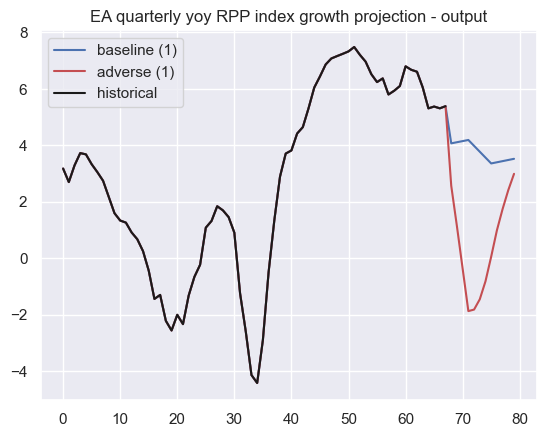

In [16]:
# plot resulting RPP growth projections in baseline and adverse scenario

plt.plot(np.concatenate((Y,Y_pred_Base.reshape(Y_pred_Base.size,1)),axis=0),'b-',label=r'baseline (1)')
plt.plot(np.concatenate((Y,Y_pred_Adve.reshape(Y_pred_Adve.size,1)),axis=0),'r-',label=r'adverse (1)')
plt.plot(Y,'k-',label=r'historical')
plt.legend(loc='upper left')
plt.title('EA quarterly yoy RPP index growth projection - output')

# save chart 
plt.savefig(graph_path /str('Chart_model_1.png'))

### MLFlow : Log Artifacts
#### Log a local file or directory as an artifact of the currently active run.
    mlflow.log_artifact(local_path, artifact_path=None)
#### Parameters
    local_path – Path to the file to write.

    artifact_path – If provided, the directory in artifact_uri to write to.

In [17]:
mlflow.log_artifact(results_path /str('Baseline_model_1.csv'))
mlflow.log_artifact(results_path /str('Adverse_model_1.csv'))
mlflow.log_artifact(graph_path /str('Chart_model_1.png'))

### Numerical evaluation

In [18]:
# calculate root (R) mean (M) squared (S) adverse (A) deviation (D) from baseline (B)
RMSADB_model_1 = np.sqrt(np.average(np.square((Y_pred_Adve - Y_pred_Base))))
RMSADB_model_1

3.7604702869771187

### MLFlow : Log Metrics
#### Log a metric under the current run..
    mlflow.log_metric(key, value, step=None)
#### Parameters
    key – Metric name (string).

    value – Metric value (float). Note that some special values such as +/- Infinity may be replaced by other values depending on the store. For example, sFor example, the SQLAlchemy store replaces +/- Inf with max / min float values.

    step – Metric step (int). Defaults to zero if unspecified.

In [19]:
mlflow.log_metric('RMSADB_model_1',RMSADB_model_1)

#### End an active MLflow run (if there is one)

In [20]:
mlflow.end_run(status='FINISHED')
print('**** FINISHED ****')

**** FINISHED ****
